<a href="https://colab.research.google.com/github/RefaelAharouni/Project_Machine_Learning_Refael_Venkatsai_Norbert_William/blob/Refa%C3%ABl/Project_Machine_Learning_Refael_Venkatsai_Norbert_William.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aharouni Refaël, Kadari Venkatsai, Devaraj Norbert Dias, Aye William $-$ DIA1
<br><br>

<p align="center"><b> Report of the Machine Learning Project</b></p><br><br>




&nbsp;&nbsp;&nbsp;The diabete is one of the most studied disease in History. The first description of its symptoms (intense thirst, abundant urine production and important tiredness) were found on an Egyptian papyrus 3575 years ago, but also on Chinese and Indian medical articles 3500 years ago, according to the article written by "PreciDIAB".
<br>However, it is Demetrius from Apameaone that first used the word "diabete" that comes from the greek word "$\delta\iota\alpha\beta\alpha\iota\nu\omicron$" ("diabaino" or "going or running through" in English) to explain the excessive urine production by the fact that water goes through all the body without being stored.

&nbsp;&nbsp;&nbsp;The discovery of insulin by Banting, Best and MacLeod in 1921 considerabely improved the treatment of this disease and saved millions of people from a certain death within 3-4 years.  

&nbsp;&nbsp;&nbsp;Despite this invention, there is still no method or medication to completely erase the diabete. This is the reason why our team, composed of Refaël Aharouni, Venkatsai Kadari, Norbert Dias Devaraj and William Aye, decided to help doctors and people to identify the potential presence of diabetes with a Machine Learning model, which would allow them to treat the diabetic patients as soon as possible.

&nbsp;&nbsp;&nbsp;After several research on diabetes, we finally found this "Comprehensive Diabetes Clinical dataset" on Kaggle with 100 000 patients records and medical informations that we will detail later. Certified MIT and made public by Priyam Choski on Kaggle in November 2024, it has a usability of 10 and comes from Hugging Face. Because the dataset contains subtitles, tag, description and a cover image, it reaches a completeness of 100%. Being a public dataset that is sourced made Kaggle grade it with a 100% credibility score. Finally, the description of the features, the MIT license and the csv format makes it 100% compatible.
<br>However, like we will see during the analysis, there is still some preprocessing to do.

&nbsp;&nbsp;&nbsp;Even if this project is relevant for healthcare analytics (early detection helps prevent severe outcomes), it is still linked with the Data & Artificial Intelligence major. Indeed, the goal is to study the relationship between the presence of diabetes for patients and features like the patient's age, his geographical location, his potential heart diseases and level of blood glucoses for example. Therefore, this problem is a binary classification one (we want to know if the patient has a diabete (the target feature) or not, given his personal information). It is relevant to the major as it enables the practical application of machine learning techniques like data preprocessing, feature engineering, and model optimization in a real-world healthcare context.

<br><br>&nbsp;&nbsp;&nbsp;&nbsp;Let us first import the libraries that will be used for this project. We can then read the the dataset with the *pd.read_csv* method and store it in the *data* variable.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler, RandomUnderSampler
from collections import Counter
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
data = pd.read_csv("diabetes_dataset.csv", sep = ",")

Now, we can print the first lines of the dataset to see what it looks like using *head* method.

In [ ]:
data.head(10)

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
5,2016,Male,66.0,Alabama,0,0,1,0,0,0,0,not current,27.32,5.7,159,0
6,2015,Female,49.0,Alabama,0,0,1,0,0,0,0,current,24.34,5.7,80,0
7,2016,Female,15.0,Alabama,0,0,0,0,1,0,0,No Info,20.98,5.0,155,0
8,2016,Male,51.0,Alabama,1,0,0,0,0,0,0,never,38.14,6.0,100,0
9,2015,Male,42.0,Alabama,0,0,1,0,0,0,0,No Info,27.32,5.7,160,0


<br><br>

# **1. Analysis and preprocessing of the data**

&nbsp;&nbsp;&nbsp;&nbsp;Let us begin this project by analyzing the data.
<br>
## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**A. Variables definition**
&nbsp;&nbsp;&nbsp;The first thing to do is understanding the variables that we are dealing with in this dataset using the *columns.tolist()* method.

In [ ]:
print(data.columns.tolist())

['year', 'gender', 'age', 'location', 'race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes']


&nbsp;&nbsp;&nbsp;From the previous result, we can draw up a list of the features and their type:

*   **Year**: This feature represents the year during which the test has been done on the patient. At first glance, we could think that this variable is *quantitative continuous* because in theory, it can take an infinite number of values. However, after using the command: "len(data["year"].value_counts())", we saw that there were only 7 different values taken for this feature, which is largely smaller than 100 000, the number of individuals. Therefore, this variable can be considered as *quantitative discrete*. <br><br>

*   **Gender:** This feature represents the gender of the patient, so it is a *qualitative nominale* variable (the possible values are: "male", "female" or "other"). <br><br>

*   **Age:** This feature is *quantitative discrete*, just as the "year" one (even if, once again, it can take every value between 0 and 150). It represents the age of the patient when the test to know if he had the diabete was made. <br><br>

*   **Location:** This variable represents the location of the patient (district or state for example), which is a qualitative nominale feature. Therefore, this variable is *qualitative nominale*.<br><br>

*   **race:AfricanAmerican**, **race:Asian**, **race:Caucasian**, **race:Hispanic**, **race:Other**: Those variables indicate if the patient is African/American or not, Asian or not, Caucasian or not, Hispanic or not, or other (or not). Therefore, they are *quantitative binary*. <br><br>

*  **hypertension**: Quantitative binary as it indicates if the patient is in hypertension or not (1 --> Hypertension, 0 --> no hypertension)<br><br>

*  **heart_disease:** Quantitative binary as it indicates if the patient has a heart disease or not (1 --> heart_disease, 0 --> no heart_disease). <br><br>

*  **smoking_history:** Qualitative ordinal because it indicates the patient's smoking frequency (with a hierarchy). The possible values are: "never" (level 0), "not current" (level 1), "former" (level 2), "ever" (level 3), "current" (level 4).<br><br>

*  **bmi:** This variable represents the ratio between the patient's weight and his height squared. Because it can take an infinite number of values, it is a *quantitative continuous* feature. <br><br>

*  **hbA1c_level:** At first glance, it seemed that this feature, representing the hemoglobin percentage of sugar in the blood, was *quantitative continuous*. However, just like the *year* feature, after using the command: "len(data["hbA1c_level"].value_counts())", we saw that there were only 18 different values taken for this feature, which is largely smaller than 100 000, the number of individuals. Therefore, this variable can also be considered as *quantitative discrete*. <br><br>

*  **blood_glucose_level:** This feature characterizes the level of the patient's blood glucose (it is expressed in mg/dL). Because it also takes 18 distinct values, it will be considered as *quantitative discrete*. <br><br>

*  **diabetes:** *Quantitative binary* as it indicates if the patient has a diabete or not (1 --> Diabete, 0 --> No diabete).

<br>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**B. Number of columns, rows and values**

&nbsp;&nbsp;&nbsp;In order to know the exact number of columns and rows, we can use the *.shape* method. The first argument will be the number of lines (number of individuals) while the second one will represent the number of columns (number of features).

In [ ]:
data.shape

(100000, 16)

Therefore, our dataset contains 100 000 individuals and 16 features. Using the *size* function allows us to know that our diabetes dataset contains 160 000 values, which is normal because we have 100 000 individuals and 16 features.

In [ ]:
data.size

1600000

<br>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**C. Missing values, inconsistencies and outliers**

&nbsp;&nbsp;&nbsp;Let us now use *.info* and *.isnull.sum()* to see if our dataset contains any missing values.

In [ ]:
print(data.info())
print("\nNumber of missing values for each feature:")
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

From what we can see, this dataset does not seem to contain any missing values.<br>However, before going any further, a little detail required our attention, especially for the "age" feature, which is in float64. To simplify the study, let us convert this feature's type into integer. It will prevent the dataset from having for example 0.54 for the age.

In [ ]:
data["age"] = data["age"].astype(int)

<br>We also need to ensure that diabetes_dataset.csv does not have any inconsistencies. This step implies to look at the potential spelling mistakes, incoherent spaces or incoherent uppercases for the qualitative columns.

Let us look at the values taken by each qualitative feature with the *data[name_feature].value_counts()* method, knowing from the *info* method precedently used that all qualitative features are "object" in our dataset.

In [ ]:
for j in data.select_dtypes(include = ["object"]).columns: # We select the qualitative columns and print the occurrencies of every value taken by each feature
  print(data[j].value_counts(), "\n\n")

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64 


location
Kentucky                2038
Iowa                    2038
Hawaii                  2038
Nebraska                2038
Florida                 2037
Minnesota               2037
Arkansas                2037
New Jersey              2037
Massachusetts           2036
Kansas                  2036
Louisiana               2036
District of Columbia    2036
Maine                   2036
Delaware                2036
Georgia                 2036
Michigan                2036
Illinois                2036
Pennsylvania            2036
Oregon                  2036
Alabama                 2036
Connecticut             2035
Maryland                2035
Alaska                  2035
North Dakota            2035
New York                2035
North Carolina          2035
Mississippi             2035
Rhode Island            2035
Colorado                2035
Missouri                2035
New Hampshire           2035
New Mexi

No spelling mistakes or additional spaces appear in our dataset. <br>However, even if it did not seem so at first glance, "smoking_history" contains more than 35 800 null values (that were registered as "No Info") and  will be treated once we will use one-hot encoder. For this feature, let us also use *map* function to rename the values taken and make them begin with uppercases. To make sure of the renaming, we can once again print the occurrencies of this feature's values using *.value_counts()* method.

In [ ]:
data["smoking_history"] = data["smoking_history"].map({"No Info": "No Info", "never": "Never", "former": "Former", "current": "Current", "not current": "Not Current", "ever": "Ever"})
data["smoking_history"].value_counts()

,count
smoking_history,
No Info,35816
Never,35095
Former,9352
Current,9286
Not Current,6447
Ever,4004


<br><br>
&nbsp;&nbsp;&nbsp;Let us now evaluate the possible inconsistencies for quantitative features. For example, let us verify that:
* Every patient's age is between 0 and 122 (the official human longevity record is held by Jeanne Louise Calment, who lived 122 years and 164 days, according to Statista).
* Every patient's BMI is between 6.7 kg/m$^2$ and 98 kg/m$^2$ (the highest BMI ever registered was 98 kg/m$^2$ according to the article of PreciDIAB's website, while the lowest was 6.7 kg/m$^2$ according to Psychiatria Polska's article).
* Every patient's blood glucose level is between 40 mg/dL and 600 mg/dL (according to Guideline Central's article, a blood glucose level greater than 600 mg/dL is very serious while American Diabetes Association tells us that a blood glucose level below 70 is characteristic of a diabetic patient).
* Every patient's hbA1c is between 0% and 20%.
* Every year in the dataset is between 1900 and 2025 as it represents the year where the diabete test has been done on the patients.

In [ ]:
print("Inconsistent ages: ", data[(data["age"] < 0) | (data["age"] > 122)])
print("Inconsistent years: ", data[(data["year"] < 1900) | (data["year"] > 2025)])
print("Inconsistent BMI: ", data[(data["bmi"] < 6.7) | (data["bmi"] > 98)])
print("Inconsistent blood glucose level: ", data[(data["blood_glucose_level"] < 40) | (data["blood_glucose_level"] > 600)])
print("Inconsistent hbA1C level: ", data[(data["hbA1c_level"] < 0) | (data["hbA1c_level"] > 20)])

Inconsistent ages:  Empty DataFrame
Columns: [year, gender, age, location, race:AfricanAmerican, race:Asian, race:Caucasian, race:Hispanic, race:Other, hypertension, heart_disease, smoking_history, bmi, hbA1c_level, blood_glucose_level, diabetes]
Index: []
Inconsistent years:  Empty DataFrame
Columns: [year, gender, age, location, race:AfricanAmerican, race:Asian, race:Caucasian, race:Hispanic, race:Other, hypertension, heart_disease, smoking_history, bmi, hbA1c_level, blood_glucose_level, diabetes]
Index: []
Inconsistent BMI:  Empty DataFrame
Columns: [year, gender, age, location, race:AfricanAmerican, race:Asian, race:Caucasian, race:Hispanic, race:Other, hypertension, heart_disease, smoking_history, bmi, hbA1c_level, blood_glucose_level, diabetes]
Index: []
Inconsistent blood glucose level:  Empty DataFrame
Columns: [year, gender, age, location, race:AfricanAmerican, race:Asian, race:Caucasian, race:Hispanic, race:Other, hypertension, heart_disease, smoking_history, bmi, hbA1c_level

Therefore, no inconstency seems to appear in our dataset.
<br><br><br>&nbsp;&nbsp;&nbsp;To go further in our analysis, let us display the boxplot of every quantitative feature to see what the outliers in our dataset are (the outliers are the points that are out of the whiskers).

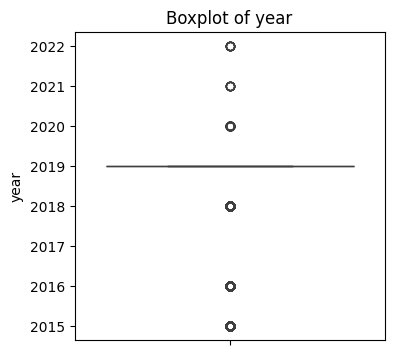

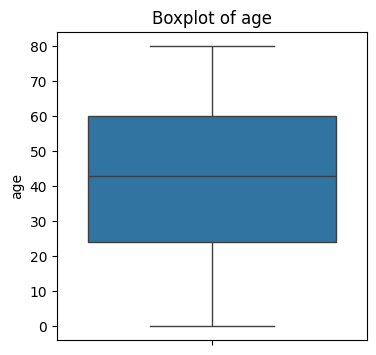

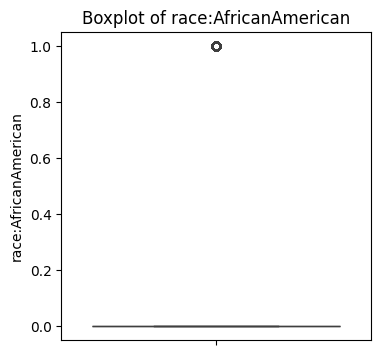

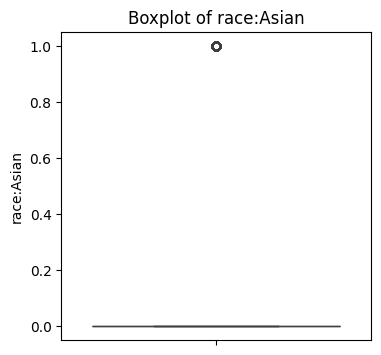

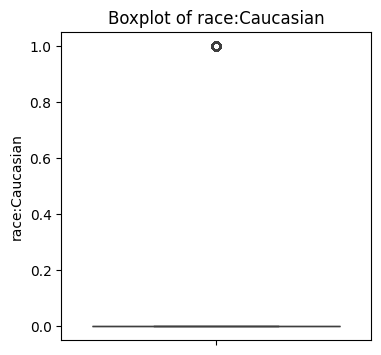

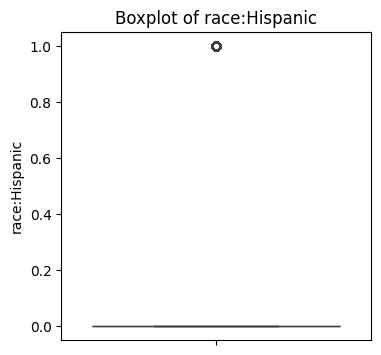

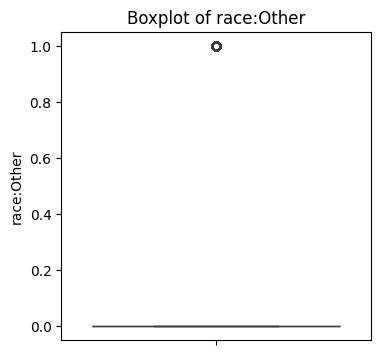

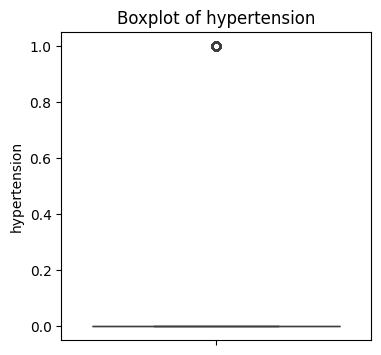

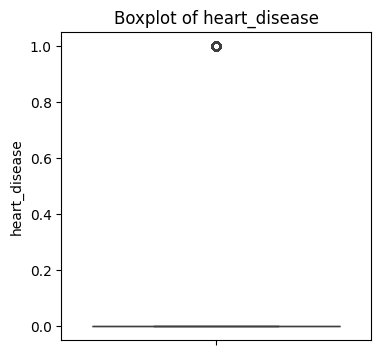

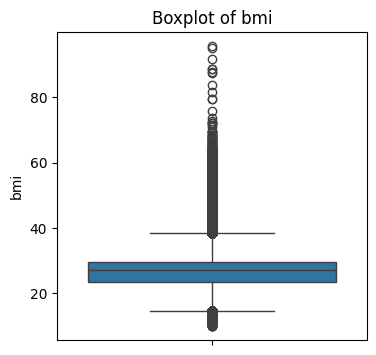

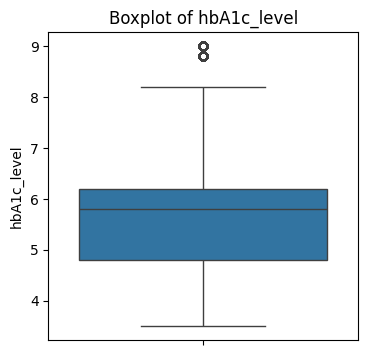

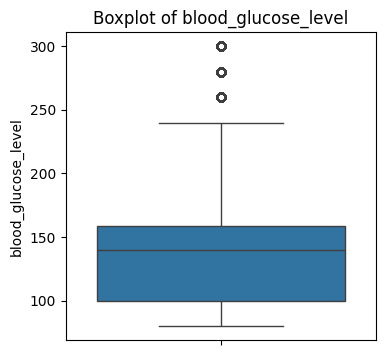

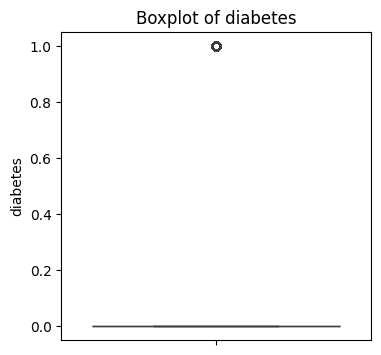

In [ ]:
for j in data.select_dtypes(include = ["int64", "float64"]).columns: # We select the quantitative features
  plt.figure(figsize = (4, 4)) # Creation of a new figure
  sns.boxplot(data[j]) # Display of boxplot
  plt.title(f"Boxplot of {j}")
  plt.show()

From what one can see here:
* The feature "Year" has some outliers, but this is because more than 75% of patients had their test in 2019 (hence, all the other values are considered as outliers). However, all values are between 2015 and 2022, so none of them is really "extreme". <br>
* The feature "age" does not have any extreme values. <br>
* For the binary features, like "race:Asian", "race:AfricanAmerican", "race:Caucasian", "race:Hispanic", "hypertension", "heart_disease" and "diabetes", 1 is always considered as an outlier. This is because the dataset is imbalanced for every one of this feature. <br>
* The "BMI" feature contains a lot of outliers, as there are many people that have a BMI greater than 40 (morbid obesity), but also patients that have a BMI less than 15 (severe malnutrition).<br>
* The features concerning the blood glucose level and hbA1c level also have 2-3 outliers, as some points are to be seen after 250 mg/dL for the blood glucose and after 8.5% for the hbA1c.

<br>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**D. Duplicated values**

&nbsp;&nbsp;&nbsp;Knowing if our dataset contains duplicated values is also useful and can be done through *data[data.duplicated()]* code. We can also use *duplicated.sum()* method to know the exact number of duplicates.

In [ ]:
print(f"There are {data.duplicated().sum()} duplicated values that are:")
data[data.duplicated()]

There are 15 duplicated values that are:


,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
1479,2019,Female,0,Alabama,0,0,0,1,0,0,0,No Info,16.46,6.0,200,0
2848,2019,Male,40,Alaska,0,0,1,0,0,0,0,No Info,27.32,6.2,85,0
21662,2019,Male,65,Georgia,0,1,0,0,0,0,0,No Info,27.32,4.0,90,0
23313,2019,Female,21,Guam,0,1,0,0,0,0,0,Never,27.32,6.6,155,0
33506,2019,Male,13,Iowa,0,1,0,0,0,0,0,No Info,27.32,4.8,160,0
43401,2019,Male,46,Maryland,0,1,0,0,0,0,0,Never,27.32,6.6,90,0
57881,2019,Female,62,Nebraska,1,0,0,0,0,0,0,No Info,27.32,4.0,126,0
59507,2019,Male,14,Nevada,0,1,0,0,0,0,0,No Info,27.32,6.5,200,0
61867,2019,Female,11,New Hampshire,0,1,0,0,0,0,0,No Info,27.32,6.6,85,0
65311,2019,Female,80,New Mexico,1,0,0,0,0,0,0,No Info,27.32,5.7,159,0


Given the fact that we have 100 000 individuals in this dataset, removing 15 individuals will not have have a huge impact on the dataset. Therefore, we can simply delete those lines using *drop_duplicates()* function.

In [ ]:
data = data.drop_duplicates()

To make sure that those lines were really deleted, let us use once again the *shape* method to display the number of lines (individuals) and columns (features).

In [ ]:
data.shape

(99985, 16)

<br>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**E. Visualization**

&nbsp;&nbsp;&nbsp;&nbsp;Let us now present an univariate analysis of different features from all the types (quantitative continuous, quantitative discrete, qualitative nominale, qualitative ordinal and binary).
<br> In this part, we will work on:
* bmi (quantitative continuous)
* Age (quantitative discrete)
* Location (qualitative nominale)
* smoking_history (qualitative ordinal)
* diabetes (binary)
<br> &nbsp;&nbsp;&nbsp;&nbsp;We already know that every feature was measured for all the patients of the dataset, this is the reason why every feature's study will be done over the 99 985 patients.

<br>

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**1. Univariate analysis of bmi (quantitative continuous)**

&nbsp;&nbsp;&nbsp;Let us begin the univariate analysis of bmi, a quantitative continuous feature representing the ratio between the patient's weight and his height squared.
<br>
&nbsp;&nbsp;&nbsp;Those are the BMI categories for adults, according to the article written by the Center for Disease Control and Prevention:
* **Underweight:** BMI $<$ 18.5
* **Healthy Weight:** 18.5 $\leq$ BMI $<$ 25.
* **Overweight:** 25 $\leq$ BMI $<$ 30.
* **Obesity:** BMI $\geq$ 30:<br>
&nbsp;&nbsp;&nbsp; $-$   **First class obesity:** 30 $\leq$ BMI $<$ 35 <br>
&nbsp;&nbsp;&nbsp; $-$   **Second class obesity:** 35 $\leq$ BMI $<$ 40. <br>
&nbsp;&nbsp;&nbsp; $-$   **Third class (morbid obesity):** BMI $>$ 40. <br><br>
&nbsp;&nbsp;&nbsp;Using the *describe()* method allows us to have the principal information about our feature.

In [ ]:
data["bmi"].describe()

,bmi
count,99985.000000
mean,27.320876
std,6.637192
min,10.010000
25%,23.630000
50%,27.320000
75%,29.580000
max,95.690000


From what we see here, 50% of the patients have a BMI greater than 27 (overweight), while 25% have at most a healthy weight as the first quartile is 23.6.
<br>Moreover, the minimum and maximum values show that there is a patient with a severe malnutrition (10.01), while one has an extreme obesity (95.69). <br>Finally, the fact that the standard deviation is equal to 6.6 shows that the distribution of BMI amongst the individuals from the dataset is very scattered, as we will see later.

<br>&nbsp;&nbsp;&nbsp;Because this feature is continuous, we can split the data into classes (5 bins for instance) and then display the histogram in value counts by classes of the feature. To better understand the proportion of each BMI class, we can also present the histogram by frequency and the cumulative distribution function.

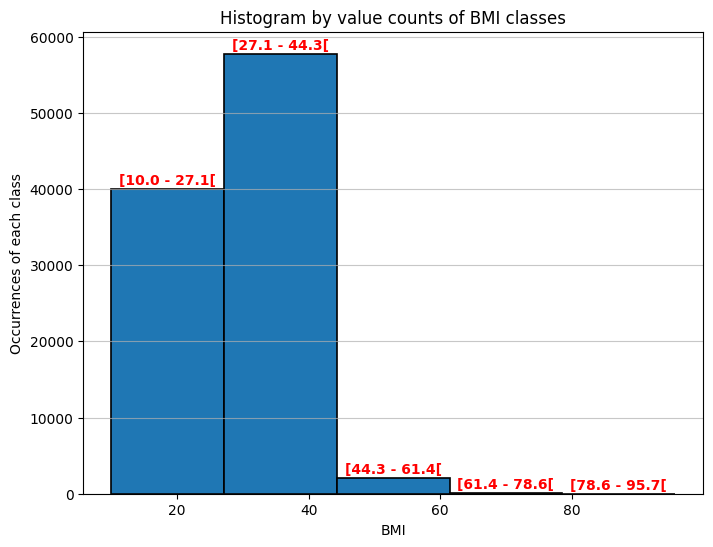

In [ ]:
plt.figure(figsize = (8, 6))
valuecounts, bins, _ = plt.hist(data["bmi"], bins = 5, edgecolor = "black", linewidth = 1.2) # We draw the histogram

# We center the text indicating the class at the top of each rectangle of the histogram
labels = [f"[{round(bins[i], 1)} - {round(bins[i+1], 1)}[" for i in range(len(bins) - 1)]
centeredLabels = [(bins[i+1] + bins[i])/2 for i in range(len(bins) - 1)]
for i, j, k in zip(centeredLabels, labels, valuecounts):
  plt.text(i, k + max(valuecounts)/100, j, ha = "center", color = "red", fontweight = "bold")

plt.title("Histogram by value counts of BMI classes")
plt.xlabel("BMI")
plt.ylabel("Occurrences of each class")
plt.grid(axis='y', linestyle='-', alpha=0.7) # We add a grid, to make the representation easier to understand
plt.show()

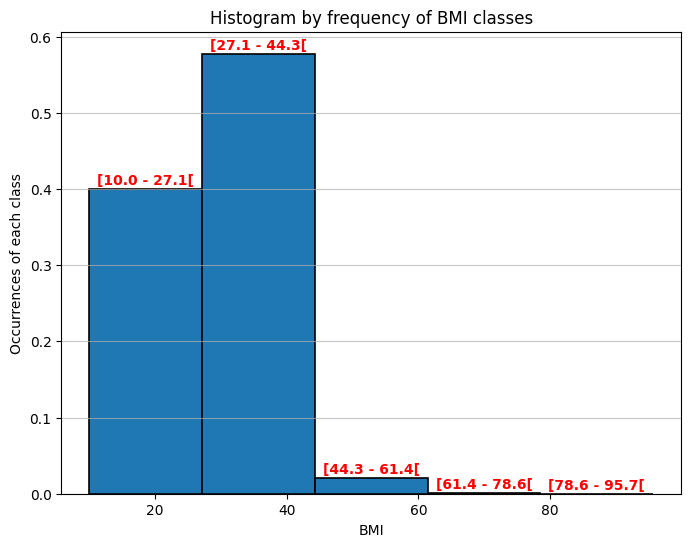

In [ ]:
plt.figure(figsize = (8, 6))
valuecounts, bins, _ = plt.hist(data["bmi"], bins = 5, edgecolor = "black", linewidth = 1.2, weights = np.ones(len(data)) / len(data)) # We add the parameter np.ones(len(data))/len(data) to print the histogram in frequency

# We center the text indicating the class at the top of each rectangle of the histogram
labels = [f"[{round(bins[i], 1)} - {round(bins[i+1], 1)}[" for i in range(len(bins) - 1)]
centeredLabels = [(bins[i+1] + bins[i])/2 for i in range(len(bins) - 1)]
for i, j, k in zip(centeredLabels, labels, valuecounts):
  plt.text(i, k + max(valuecounts)/100, j, ha = "center", color = "red", fontweight = "bold")

plt.title("Histogram by frequency of BMI classes")
plt.xlabel("BMI")
plt.ylabel("Occurrences of each class")
plt.grid(axis='y', linestyle='-', alpha=0.7) # We add a grid to make the representation easier to understand
plt.show()

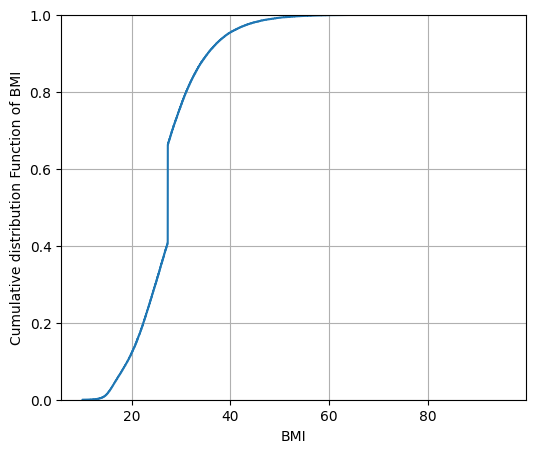

In [ ]:
plt.figure(figsize = (6, 5))
sns.ecdfplot(data = data, x = "bmi", linewidth = 1.5)
plt.xlabel('BMI')
plt.ylabel("Cumulative distribution Function of BMI")
plt.grid(True)
plt.show()

These histograms indicate us that BMIs' values were separated into 5 classes:
* $ [10, 27.1[$, which represents 40% of patients from the dataset ($\approx$ 40 000 individuals) that are at most in overweight (underweight patients, healthy weight patients and overweight patients with a BMI between 25 and 27). <br>
* $ [27.1, 44.3[$, which designates the 55 000 patients ($\approx$ 55% of individuals) in overweight (with a BMI between 27 and 30) or in obesity (from class 1, 2 or 3) <br>
* $ [44.3, 61.4[$, characterizing roughly 3 000 patients ($\approx$ 3% of individuals) that have morbid obesity with a BMI between 44.3 and 61.4. <br>
* $ [61.4, 78.6[$ and $[78.6, 95.7[$ that cumulate less than 1 000 patients ($\approx$ 1% of patients) each and characterize the individuals with extreme obesity (BMI between 61.4 and 78.6 or 78.6 and 95.7).


<br><br>

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**2. Univariate analysis of age (quantitative discrete)**

&nbsp;&nbsp;&nbsp;Let us now talk of the "age" feature, representing the age of the patient at the moment of the diabetes test. Once again, we begin with the *describe* method to display the principal information about the feature.

In [ ]:
data["age"].describe()

,age
count,99985.000000
mean,41.876151
std,22.534712
min,0.000000
25%,24.000000
50%,43.000000
75%,60.000000
max,80.000000


&nbsp;&nbsp;&nbsp;This array allows us to understand that the patient's age was approximately 42, while a patient was just a few months old, a few weeks old or a few days old as proves the minimum value of 0. The fact that the oldest patient was 80 years old justifies the high value of standard deviation (patients from all kinds of ages did the test).
<br>&nbsp;&nbsp;&nbsp;Moreover, 25% of the patients ($\approx$ 24 996 patients) were at most 24 years old, while 50% of them were 43 years old and 24 996 patients were older than 60.

In [ ]:
print(f"Finally, it is also interesting to remark that the most represented age (the mode) in the dataset is {data["age"].mode().iloc[0]}, which is also the maximum.")

Finally, it is also interesting to remark that the most represented age (the mode) in the dataset is 80, which is also the maximum.


<br><br>&nbsp;&nbsp;&nbsp;Before looking at the occurrencies and frequencies of this feature's values, let us simplify the study by splitting the values into 4 different classes: [0, 20], [21, 40], [41, 60] and [61, 80] using *pd.cut* method.

In [ ]:
classes = pd.cut(data["age"], bins = [0, 20, 40, 60, 80], labels = ["0-20", "21-40", "41-60", "61-80"], include_lowest = True)
pd.DataFrame({"Occurrencies": classes.value_counts().sort_index(), "Frequencies" : classes.value_counts(normalize = True).sort_index()})

,Occurrencies,Frequencies
age,,
0-20,20898,0.209011
21-40,25966,0.259699
41-60,29494,0.294984
61-80,23627,0.236305


&nbsp;&nbsp;&nbsp;We understand from this DataFrame that all the classes are balanced, as there are between 20% and 30% of individuals from the dataset for every class ($\approx$ 21% of the patients are between some months old to 20 years old, $\approx$ 26% of individuals are between 21 and 40 years old, while 29% of patients are in the [41, 60[ segment and 24% are older than 61 years old). <br>&nbsp;&nbsp;&nbsp;To have a better representation of the distribution of age amongst the patients from the dataset, we can also display a bar chart (using *plt.stem* function) and a bar chart using *plt.pie* method).

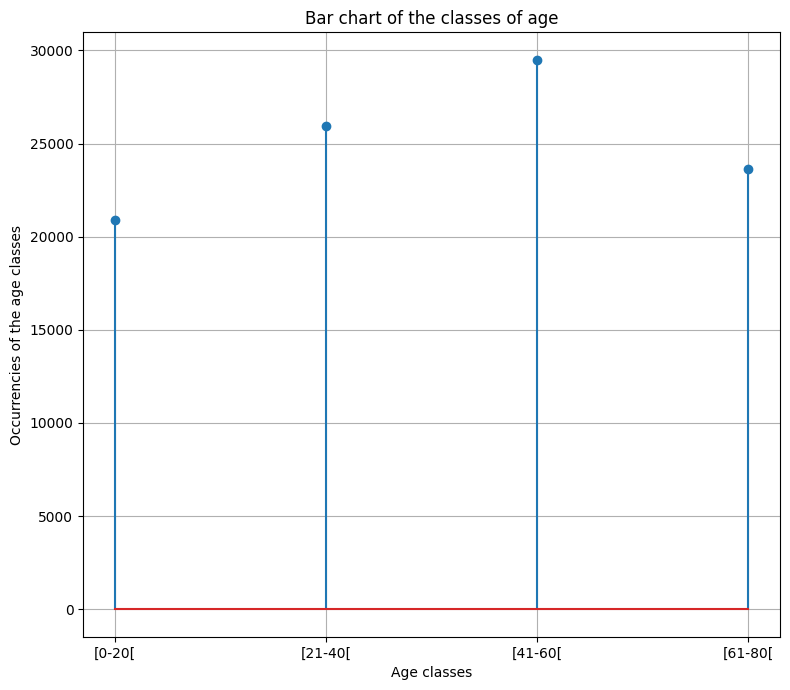

In [ ]:
plt.figure(figsize = (8, 7))
plt.stem([f"[{str(i)}[" for i in classes.value_counts().sort_index().index], classes.value_counts().sort_index().values)
plt.title("Bar chart of the classes of age")
plt.xlabel("Age classes")
plt.ylabel("Occurrencies of the age classes")
plt.grid(True)
plt.tight_layout()
plt.show()

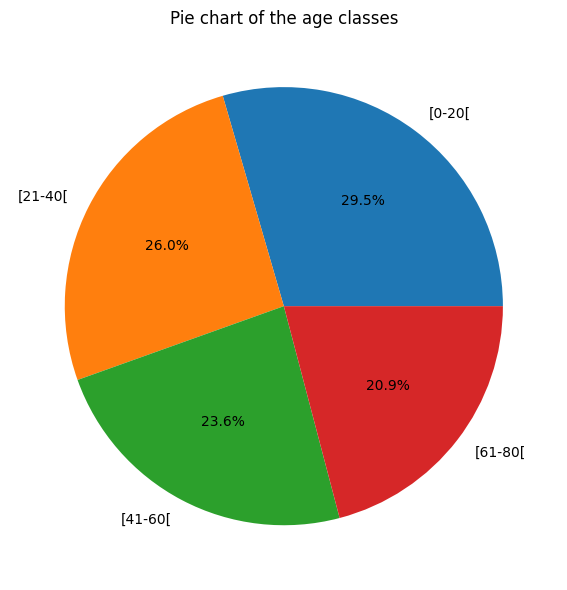

In [ ]:
plt.figure(figsize = (6,6))
plt.pie(classes.value_counts(), labels = [f"[{str(i)}[" for i in classes.value_counts().sort_index().index], autopct = '%1.1f%%')
plt.title("Pie chart of the age classes")
plt.tight_layout()
plt.show()

<br><br>

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**3. Univariate analysis of Location (qualitative nominale)**

&nbsp;&nbsp;&nbsp;Let us continue by presenting an univariate analysis of *Location* feature representing the place where the patient lives (district, state for example), which is a qualitative nominale feature. Let us study once again the distribution through frequencies.

In [ ]:
data["location"].value_counts(normalize = True)

,proportion
location,
Hawaii,0.020383
Kentucky,0.020383
Arkansas,0.020373
Florida,0.020373
Iowa,0.020373
Nebraska,0.020373
Minnesota,0.020373
New Jersey,0.020373
Massachusetts,0.020363


<br><br>

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**4. Univariate analysis of smoking_history (qualitative ordinale)**

<br><br>

### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**5. Univariate analysis of diabetes (binary)**

<br><br>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**F. Data balance**

&nbsp;&nbsp;&nbsp;Let us now continue our analysis and preprocessing of the dataset by observing the balance of the feature "diabetes". This process will help us to know which models and pipelines will be used later.
<br>&nbsp;&nbsp;&nbsp;First, let us use once again *value_counts()* method to print the number of occurrences of both classes (0 and 1) for the target feature: "diabetes".
<br>&nbsp;&nbsp;&nbsp;We can also use *min* and *max* functions to calculate the ratio between the minority class and the majority one.  

In [ ]:
print(data["diabetes"].value_counts())
minority = data["diabetes"].value_counts().min()
majority = data["diabetes"].value_counts().max()
ratio = majority / minority
print(f"Imbalance ratio ≈ 1:{ratio:.2f}")

diabetes
0    91485
1     8500
Name: count, dtype: int64
Imbalance ratio ≈ 1:10.76


From what one can see here, the majoritarian class is the 0 (representing the patients without diabete), while the minority class is the 1 (representing the patients with diabete).<br>
The fact that there are 10.76 times more patients without diabete than patients with diabete proves that this feature is highly imbalanced. To counter this imbalance, some models like RandomOverSampling or SMOTE will be used later.

<br>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**G. Correlation analysis and encoding**

&nbsp;&nbsp;&nbsp;In this part, we will study the correlation between the different features and use encoding to split qualitative features into dummies ones (quantitative binary).
<br>&nbsp;&nbsp;&nbsp;Let us first display the correlation matrix to see which variables are independent (correlation far from $\pm1$) from the others and which ones directly depend from one another (correlation close to $\pm1$).

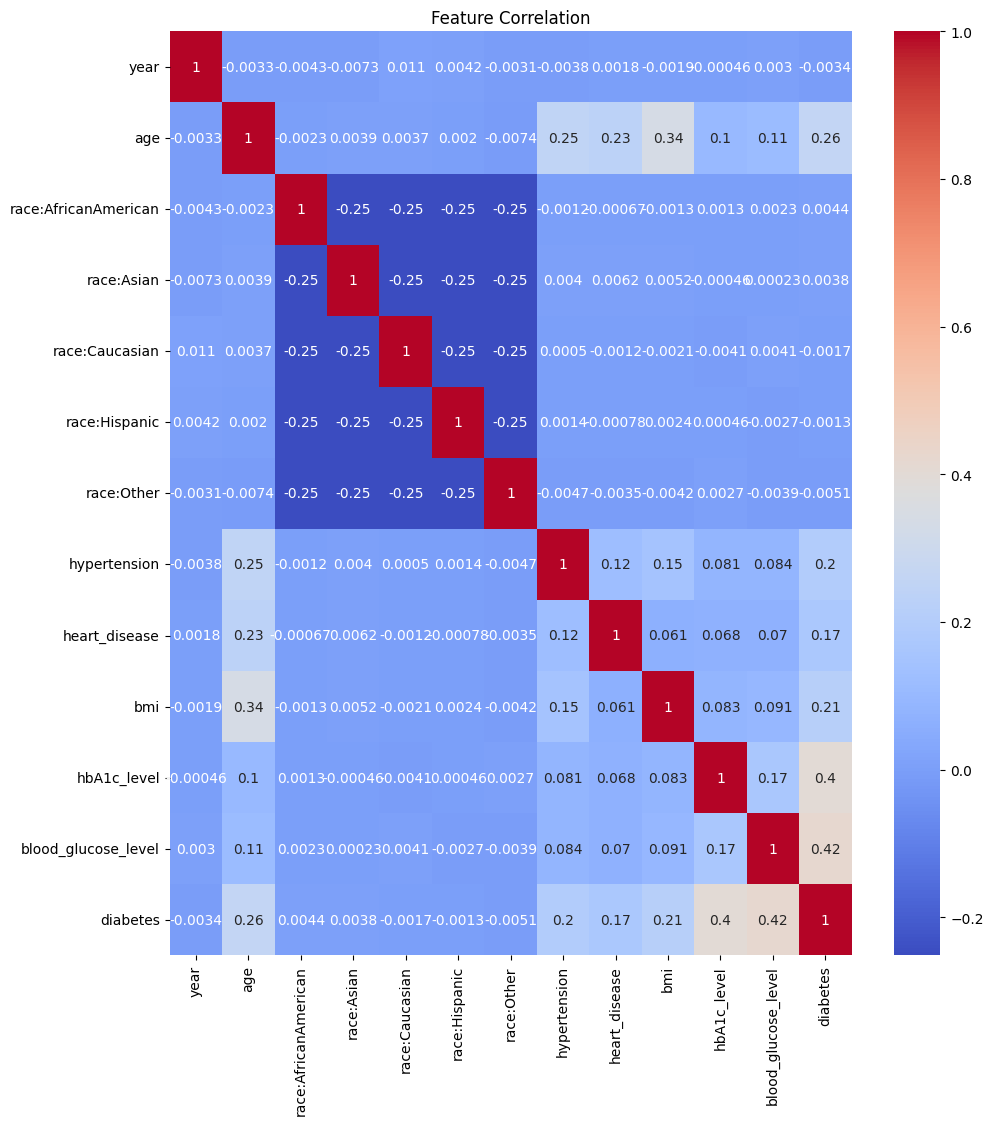

In [ ]:
plt.figure(figsize=(11, 12)) # Creation of the figure that will represent the correlation matrix
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm') # We keep only quantitative variables and print the correlation matrix
plt.title("Feature Correlation")
plt.show()

If we look at the last line of this matrix, we can see that the features the most correlated to "diabetes" are:
* blood_glucose_level (correlation of 0.42)
* hbA1c_level (correlation of 0.4)
* age (correlation of 0.26)
However, the relationship between those variables and diabete is slight and qualitative features don't appear in the matrix.
<br>To resolve this problem, let us transform the qualitative features into quantitative binary features using *pd.get_dummies* function. To make sure that the new features will take 0/1 values instead of "True"/"False", we can add the parameter: *dtype = int* at the end of the *get_dummies* function.


In [ ]:
data_encoded = pd.get_dummies(data, columns = data.select_dtypes(include = "object").columns, drop_first=True, dtype = int)
data_encoded.head()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,...,location_Virginia,location_Washington,location_West Virginia,location_Wisconsin,location_Wyoming,smoking_history_Ever,smoking_history_Former,smoking_history_Never,smoking_history_No Info,smoking_history_Not Current
0,2020,32,0,0,0,0,1,0,0,27.32,...,0,0,0,0,0,0,0,1,0,0
1,2015,29,0,1,0,0,0,0,0,19.95,...,0,0,0,0,0,0,0,1,0,0
2,2015,18,0,0,0,0,1,0,0,23.76,...,0,0,0,0,0,0,0,1,0,0
3,2015,41,0,0,1,0,0,0,0,27.32,...,0,0,0,0,0,0,0,1,0,0
4,2016,52,1,0,0,0,0,0,0,23.75,...,0,0,0,0,0,0,0,1,0,0


Let us now see the new number of columns (features) and lines (individuals) using the *shape* function.

In [ ]:
data_encoded.shape

(99985, 74)

As one can see, approximately 60 new features appeared, and we now have 99 986 individuals and 74 features.
<br>Because all the features are now quantitative, we can once again print the correlation matrix. To simplify the display, we will apply a filter: we will only keep the line of diabetes (because for the moment, only the relationships between the diabetes and the other features are important) and the features that have an absolute correlation of more than 0.25 with diabetes.

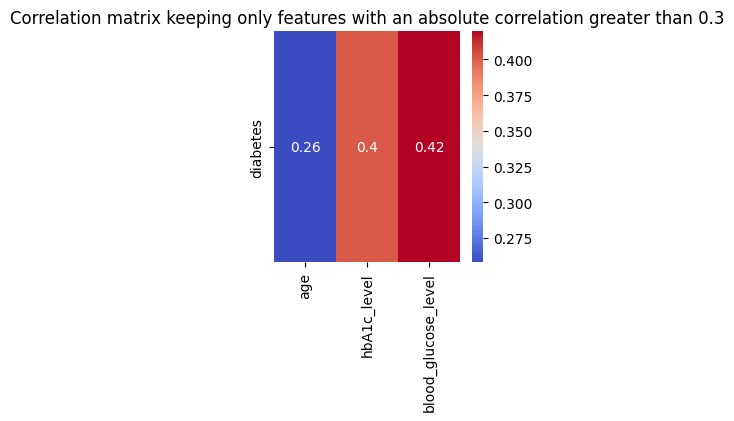

In [ ]:
matrix = data_encoded.corr(numeric_only = True)
matrix_temp = matrix["diabetes"].drop("diabetes") # We delete the cell showing the relationship between diabetes and itself (useless)
matrix_filtered = matrix_temp[abs(matrix_temp) > 0.25] # We filter the matrix to keep the features having an absolute value correlation with diabetes greater than 0.25
plt.figure(figsize = (3, 3))
sns.heatmap(matrix_filtered.to_frame().T, annot = True, cmap = 'coolwarm') # We convert the matrix into a dataframe and print its transpose to have an horizontal result.
plt.title("Correlation matrix keeping only features with an absolute correlation greater than 0.3")
plt.show()

From this final correlation matrix, we understand that the variables the most correlated to "diabetes" are the blood glucose level (correlation of 0.42), then the hbA1c_level (correlation of 0.4) and finally the age (0.26).
<br>However, once again, those correlations with diabetes remain slight (for hba1c_level and blood_glucose_level) or even weak (for age).

<br><br>

# **2. Train_test_split and implementation of algorithms and pipelines**

&nbsp;&nbsp;&nbsp;As we saw in the first part, the dataset's feature target is "diabetes", while the other features are explicative ones. This is the reason why the feature "diabetes" will be called *y* while the others will be grouped in a variable called *X*.

In [ ]:
X = data_encoded.drop('diabetes', axis=1)
y = data_encoded['diabetes']

We can now use *train_test_split* function with a *test_size* of 0.3 to split our dataset into a training set and a test set. The training set (70%) will be used to train the model and tune parameters, while the testing set will serve as a model generalization after the testing part. Because our dataset is moderately imbalanced (ratio $\approx$ 11 as we saw before), we can add the parameter *stratify = y* to keep the same class proportions.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

<br>

## &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**A. Creation of models without considering the imbalance of *diabetes***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Now that the separation between the training and the test has been done, we can develop some models to predict if a patient has diabete or not. We can first define a dictionary contaning some models, like LogisticRegression, DecisionTree and RandomForest.

* Logistic Regression is a linear model that estimates probabilities using a logistic function. It takes two parameters: *max_iter=1000*, which ensures an enough number of iterations to make the problem converge and *random_state=42*, which ensures the reproducibility of results.

* Decision Tree, as for it, is a non-linear model that splits data into branches based on feature values. It also takes the parameter *random_state=42* to make sure that the tree's structure is consistent across runs.

* Random Forest is an ensemble of decision trees that improves accuracy and reduces overfitting. Once more, it needs the parameter *random_state=42*, so that the forest structure is reproductible.

In [ ]:
models = { "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42) }
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"\n{name} Performance:\n{classification_report(y_test, model.predict(X_test))}\n")

<br>

# STEP 3: Handle Class Imbalance with SMOTE

In [ ]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("Resampled class distribution:", Counter(y_resampled))

In [ ]:
# Retrain Random Forest on resampled data
rf_balanced = RandomForestClassifier(random_state=42)
rf_balanced.fit(X_resampled, y_resampled)
print("\nRandom Forest (SMOTE) Performance:")
print(classification_report(y_test, rf_balanced.predict(X_test)))

<br><br>

# **3. Data normalization and reduction**

# **4. Analysis of the results and management of the overfitting**

In [ ]:
def evaluate_model(model, X_test, y_test, label="Model"):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    auc_roc = auc(fpr, tpr)
    auc_pr = auc(recall, precision)

    print(f"\n=== {label} ===")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"AUC (ROC): {auc_roc:.3f} | AUC (PR): {auc_pr:.3f}")

    # Plot ROC
    plt.figure()
    plt.plot(fpr, tpr, label=f"{label} ROC (AUC={auc_roc:.2f})")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Precision-Recall
    plt.figure()
    plt.plot(recall, precision, label=f"{label} PR (AUC={auc_pr:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

# Evaluate both models
evaluate_model(models["Random Forest"], X_test, y_test, label="Random Forest (Baseline)")
evaluate_model(rf_balanced, X_test, y_test, label="Random Forest (SMOTE)")

# Cost-Sensitive Evaluation
def custom_cost(y_true, y_pred, fn_weight=10, fp_weight=1):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn_weight * fn + fp_weight * fp

cost_baseline = custom_cost(y_test, models["Random Forest"].predict(X_test))
cost_smote = custom_cost(y_test, rf_balanced.predict(X_test))

print(f"Custom Cost (Baseline): {cost_baseline}")
print(f"Custom Cost (SMOTE): {cost_smote}")

  RANDOM OVER SAMPLING

In [ ]:

import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load your dataset
df = pd.read_csv('diabetes_dataset.csv')

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


RANOM UNDER SAMPLING

In [ ]:
# Import necessary libraries
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load your dataset
df = pd.read_csv('diabetes_dataset.csv')

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply RandomUnderSampler to balance the training data
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


HYPERPARAMETER TUNING FOR RANDOM FOREST USING RANDOM OVERSAMPLING


In [ ]:
# Step 2: Load and preprocess the dataset

# Load the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv("diabetes_dataset.csv")

# One-hot encode categorical variables to convert them into numeric format
# 'drop_first=True' avoids the dummy variable trap by dropping one category per feature
data_encoded = pd.get_dummies(data, columns=['gender', 'location', 'smoking_history'], drop_first=True)

# Split the dataset into features (X) and target variable (y)
# X = all predictor columns, y = target column ('diabetes')
X = data_encoded.drop('diabetes', axis=1)
y = data_encoded['diabetes']


In [ ]:
# Step 3: Split data into training and test sets

# Split the dataset into 70% training and 30% testing data
# stratify=y ensures class distribution remains consistent across both sets
# random_state=42 makes results reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [ ]:
# Step 4: Balance the training data using Random OverSampling

# Initialize RandomOverSampler to handle class imbalance
# random_state=42 ensures reproducibility of the oversampling process
ros = RandomOverSampler(random_state=42)

# Fit the oversampler on the training data and create a balanced dataset
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [ ]:
# Step 5: Scale the features (optional for Random Forest, but improves consistency)

# Import StandardScaler for feature normalization
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 6: Define the Random Forest model and hyperparameter grid

# Initialize the Random Forest classifier
# random_state=42 ensures reproducibility of results
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],       # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of each tree
    'min_samples_split': [2, 5],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2],       # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2']  # Number of features considered for splitting
}


In [ ]:
# Step 7: Perform hyperparameter tuning using RandomizedSearchCV

# Initialize RandomizedSearchCV to find the best parameters efficiently
random_search = RandomizedSearchCV(
    estimator=rf,                   # Base model (Random Forest)
    param_distributions=param_grid, # Parameter grid to sample from
    n_iter=20,                      # Number of random parameter combinations to test
    cv=2,                           # 2-fold cross-validation
    scoring='f1',                   # Optimize model for F1-score
    verbose=2,                      # Show progress logs
    n_jobs=-1,                      # Use all CPU cores for faster computation
    random_state=42                 # Ensure reproducibility
)


In [ ]:
# Step 8: Train the model using randomized search on the balanced training data

# Fit RandomizedSearchCV to the oversampled and scaled training data
# This process searches for the best combination of hyperparameters
random_search.fit(X_resampled_scaled, y_resampled)


In [ ]:
# Step 9: Retrieve the best model and its optimal parameters

# Get the Random Forest model with the best-found hyperparameters
best_rf = random_search.best_estimator_

# Display the optimal parameter values selected by RandomizedSearchCV
print("Best Parameters:", random_search.best_params_)


In [ ]:
# Step 10: Evaluate the tuned model on the test set

# Predict class labels and probabilities on the scaled test data
y_pred = best_rf.predict(X_test_scaled)
y_proba = best_rf.predict_proba(X_test_scaled)[:, 1]

# Display classification performance metrics
print("\n=== Tuned Random Forest (Random OverSampling) ===")
print(classification_report(y_test, y_pred))          # Shows precision, recall, F1-score, and accuracy
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  # Displays prediction outcomes


In [ ]:
# Step 11: Plot ROC and Precision-Recall curves

# Compute ROC and Precision-Recall metrics
fpr, tpr, _ = roc_curve(y_test, y_proba)                        # ROC: False Positive vs True Positive Rates
precision, recall, _ = precision_recall_curve(y_test, y_proba)  # PR: Precision vs Recall
roc_auc = auc(fpr, tpr)                                         # Area under ROC curve
pr_auc = auc(recall, precision)                                 # Area under Precision-Recall curve

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")    # Plot ROC line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')          # Diagonal reference line
plt.xlabel("False Positive Rate")                               # X-axis label
plt.ylabel("True Positive Rate")                                # Y-axis label
plt.title("ROC Curve")                                          # Chart title
plt.legend()                                                    # Show legend
plt.grid(True)                                                  # Add grid
plt.show()                                                      # Display plot

# Plot Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.2f})")  # Plot PR line
plt.xlabel("Recall")                                                 # X-axis label
plt.ylabel("Precision")                                              # Y-axis label
plt.title("Precision-Recall Curve")                                  # Chart title
plt.legend()                                                         # Show legend
plt.grid(True)                                                       # Add grid
plt.show()                                                           # Display plot


LOGISTIC REGRESSION WITH RANDOM OVERSAMPLING

In [ ]:
# Step 2: Load and preprocess the dataset

# Load the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv("diabetes_dataset.csv")

# Convert categorical features into numeric form using one-hot encoding
# 'drop_first=True' avoids multicollinearity by dropping the first category of each variable
data_encoded = pd.get_dummies(data, columns=['gender', 'location', 'smoking_history'], drop_first=True)

# Split the dataset into features (X) and target variable (y)
# X contains all independent variables, y contains the target column ('diabetes')
X = data_encoded.drop('diabetes', axis=1)
y = data_encoded['diabetes']


In [ ]:
# Step 3: Split data into training and test sets

# stratify=y keeps the same class distribution in both training and test sets
# test_size=0.3 allocates 30% of the data for testing and 70% for training
# random_state=42 ensures reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [ ]:
# Step 4: Balance the training data using Random OverSampling

# Initialize RandomOverSampler to handle class imbalance
# random_state=42 ensures reproducibility
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data to create a balanced dataset
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [ ]:
# Step 5: Scale the features (important for Logistic Regression)

# Initialize the StandardScaler to normalize feature values
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 6: Define and train Logistic Regression with selected hyperparameters

# Initialize Logistic Regression with specified parameters
# C=1.0 controls regularization strength, penalty='l2' applies L2 regularization
# solver='liblinear' is efficient for small datasets, max_iter=1000 ensures convergence
best_log_reg = LogisticRegression(
    C=1.0,
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

# Train the model on the balanced and scaled training data
best_log_reg.fit(X_resampled_scaled, y_resampled)


In [ ]:
# Step 7: Evaluate the trained Logistic Regression model on the test set

# Predict class labels and probabilities on the scaled test data
y_pred = best_log_reg.predict(X_test_scaled)
y_proba = best_log_reg.predict_proba(X_test_scaled)[:, 1]

# Display model performance results
print("\n=== Tuned Logistic Regression (Random OverSampling) ===")
print(classification_report(y_test, y_pred))          # Prints precision, recall, f1-score, and accuracy
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  # Displays confusion matrix


In [ ]:
# Step 8: Plot ROC and Precision-Recall curves

# Compute ROC and Precision-Recall metrics
fpr, tpr, _ = roc_curve(y_test, y_proba)                        # ROC: False Positive vs True Positive Rate
precision, recall, _ = precision_recall_curve(y_test, y_proba)  # Precision-Recall metrics
roc_auc = auc(fpr, tpr)                                         # Area under ROC curve
pr_auc = auc(recall, precision)                                 # Area under Precision-Recall curve

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")    # Plot ROC curve line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')          # Reference line for random model
plt.xlabel("False Positive Rate")                               # X-axis label
plt.ylabel("True Positive Rate")                                # Y-axis label
plt.title("ROC Curve")                                          # Title for ROC curve
plt.legend()                                                    # Show legend
plt.grid(True)                                                  # Display grid
plt.show()                                                      # Show plot

# Plot Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.2f})")  # Plot PR curve line
plt.xlabel("Recall")                                                 # X-axis label
plt.ylabel("Precision")                                              # Y-axis label
plt.title("Precision-Recall Curve")                                  # Title for PR curve
plt.legend()                                                         # Show legend
plt.grid(True)                                                       # Display grid
plt.show()                                                           # Show plot


DECISION TREE WITH OVERSAMPLING

In [ ]:
# Step 2: Load and preprocess the dataset

# Load the dataset into a pandas DataFrame
data = pd.read_csv("diabetes_dataset.csv")

# One-hot encode categorical columns to convert text data into numeric format
# 'drop_first=True' removes the first category to prevent dummy variable trap
data_encoded = pd.get_dummies(data, columns=['gender', 'location', 'smoking_history'], drop_first=True)

# Split the data into features (X) and target variable (y)
# X = all predictor variables, y = target label ('diabetes')
X = data_encoded.drop('diabetes', axis=1)
y = data_encoded['diabetes']


In [ ]:
# Step 3: Split data into training and test sets

# Split the dataset into 70% training and 30% testing data
# stratify=y ensures class proportions are the same in both sets (important for imbalanced data)
# random_state=42 ensures reproducibility of results
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)


In [ ]:
# Step 4: Balance the training data using Random OverSampling

# Initialize RandomOverSampler to handle class imbalance
# random_state=42 ensures consistent resampling across runs
ros = RandomOverSampler(random_state=42)

# Fit and resample the training data to create a balanced dataset
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [ ]:
# Step 5: Scale the features (optional for Decision Tree)

# Initialize StandardScaler to normalize feature values
scaler = StandardScaler()

# Fit the scaler on the training data and apply transformation
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Apply the same scaling to the test data to maintain consistency
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 6: Define the Decision Tree model and hyperparameter grid

# Initialize the Decision Tree Classifier
# random_state=42 ensures reproducibility of results
dt = DecisionTreeClassifier(random_state=42)

# Define the grid of hyperparameters for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],     # Function to measure quality of a split
    'max_depth': [5, 10, 20, None],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]         # Minimum samples required at each leaf node
}


In [ ]:
# Step 7: Perform hyperparameter tuning using RandomizedSearchCV

# Initialize RandomizedSearchCV to randomly test parameter combinations for efficiency
random_search = RandomizedSearchCV(
    estimator=dt,                   # Base model (Decision Tree)
    param_distributions=param_grid, # Hyperparameter grid to sample from
    n_iter=20,                      # Number of random parameter combinations to try
    cv=2,                           # 2-fold cross-validation
    scoring='f1',                   # Optimize model based on F1-score
    verbose=2,                      # Display progress during training
    n_jobs=-1,                      # Utilize all CPU cores for faster computation
    random_state=42                 # Ensure reproducibility
)


In [ ]:
# Step 8: Train the model using randomized search on the balanced training data

# Fit RandomizedSearchCV to the scaled and resampled training data
# This process searches for the best hyperparameter combination
random_search.fit(X_resampled_scaled, y_resampled)


In [ ]:
# Step 9: Retrieve the best model and its optimal parameters

# Get the Decision Tree model with the best-found hyperparameters
best_dt = random_search.best_estimator_

# Print the best parameter combination selected by RandomizedSearchCV
print("Best Parameters:", random_search.best_params_)


In [ ]:
# Step 10: Evaluate the tuned Decision Tree model on the test set

# Predict class labels and probabilities on the scaled test data
y_pred = best_dt.predict(X_test_scaled)
y_proba = best_dt.predict_proba(X_test_scaled)[:, 1]

# Calculate overall model accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display evaluation metrics
print("\n=== Tuned Decision Tree (Random OverSampling) ===")
print(f"Accuracy: {accuracy:.4f}")                          # Print model accuracy
print(classification_report(y_test, y_pred))                # Print precision, recall, f1-score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  # Show confusion matrix


In [ ]:
# Step 11: Plot ROC and Precision-Recall curves

# Compute ROC and Precision-Recall metrics
fpr, tpr, _ = roc_curve(y_test, y_proba)                        # Calculate False Positive and True Positive Rates
precision, recall, _ = precision_recall_curve(y_test, y_proba)  # Compute Precision and Recall values
roc_auc = auc(fpr, tpr)                                         # Calculate Area Under ROC Curve
pr_auc = auc(recall, precision)                                 # Calculate Area Under Precision-Recall Curve

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")    # Plot ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')          # Add diagonal reference line
plt.xlabel("False Positive Rate")                               # X-axis label
plt.ylabel("True Positive Rate")                                # Y-axis label
plt.title("ROC Curve")                                          # Chart title
plt.legend()                                                    # Show legend
plt.grid(True)                                                  # Enable grid
plt.show()                                                      # Display ROC plot

# Plot Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.2f})")  # Plot PR curve
plt.xlabel("Recall")                                                 # X-axis label
plt.ylabel("Precision")                                              # Y-axis label
plt.title("Precision-Recall Curve")                                  # Chart title
plt.legend()                                                         # Show legend
plt.grid(True)                                                       # Enable grid
plt.show()                                                           # Display PR plot


# The Learning and Testing Plan

After splitting, **class imbalance** was observed in the target variable.  
To address this issue, we applied **Random OverSampling** using `RandomOverSampler()` from `imblearn`, which duplicates samples from the minority class to balance the dataset.  
This prevents the model from being biased toward the majority (non-diabetic) class.

Feature scaling was performed using **StandardScaler** to normalize feature values (mean = 0, standard deviation = 1).  
Although scaling is not always necessary for tree-based models, it improves consistency and stability during training and comparison with other algorithms.



**Methods for Controlling Overfitting**:

Overfitting occurs when a model learns noise and specific patterns from the training data instead of generalizing to new data.  
To control and minimize overfitting, several strategies were implemented:

#### 🔹 Cross-Validation
- **RandomizedSearchCV** with **cross-validation (cv=2)** was used to evaluate model performance on multiple folds.
- This ensures that model selection is based on generalized performance rather than a single train-test split.

#### 🔹 Hyperparameter Tuning
- Parameters such as `max_depth`, `min_samples_split`, and `min_samples_leaf` (for Decision Trees and Random Forests) were optimized.
- Proper tuning limits model complexity and reduces the risk of overfitting.

#### 🔹 Regularization (for Logistic Regression)
- The **L2 penalty** was used to prevent coefficient weights from becoming too large, ensuring smoother decision boundaries.

#### 🔹 Evaluation Metrics
- Instead of relying only on accuracy, we used **F1-score**, **ROC-AUC**, and **Precision-Recall AUC** to balance performance between positive and negative classes.
- These metrics help detect overfitting if the model performs too well on training data but poorly on testing data.

#### 🔹 Visualization
- **ROC** and **Precision-Recall curves** were plotted to analyze model discrimination capability and detect signs of overfitting visually.


 **Address overfitting, underfitting, obstacles**

In [ ]:


def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1)
    plt.figure(figsize=(8,5))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Validation score')
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

# **Relevant metrics**

In [ ]:

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')


# Voting, Bagging, Stacking

In [ ]:


## Base models
log_clf = LogisticRegression(max_iter=200)
tree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

## Voting
voting_clf = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('dt', tree_clf),
    ('rf', rf_clf)
], voting='hard')
voting_clf.fit(X_train, y_train)
print("Voting Accuracy:", voting_clf.score(X_test, y_test))

## Bagging
bagging = BaggingClassifier(estimator=tree_clf, n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
print("Bagging Accuracy:", bagging.score(X_test, y_test))

## Stacking
stacking = StackingClassifier(
    estimators=[('lr', log_clf), ('knn', KNeighborsClassifier())],
    final_estimator=RandomForestClassifier(n_estimators=100, random_state=42)
)
stacking.fit(X_train, y_train)
print("Stacking Accuracy:", stacking.score(X_test, y_test))
